Gerando gráficos com a previsão definida...


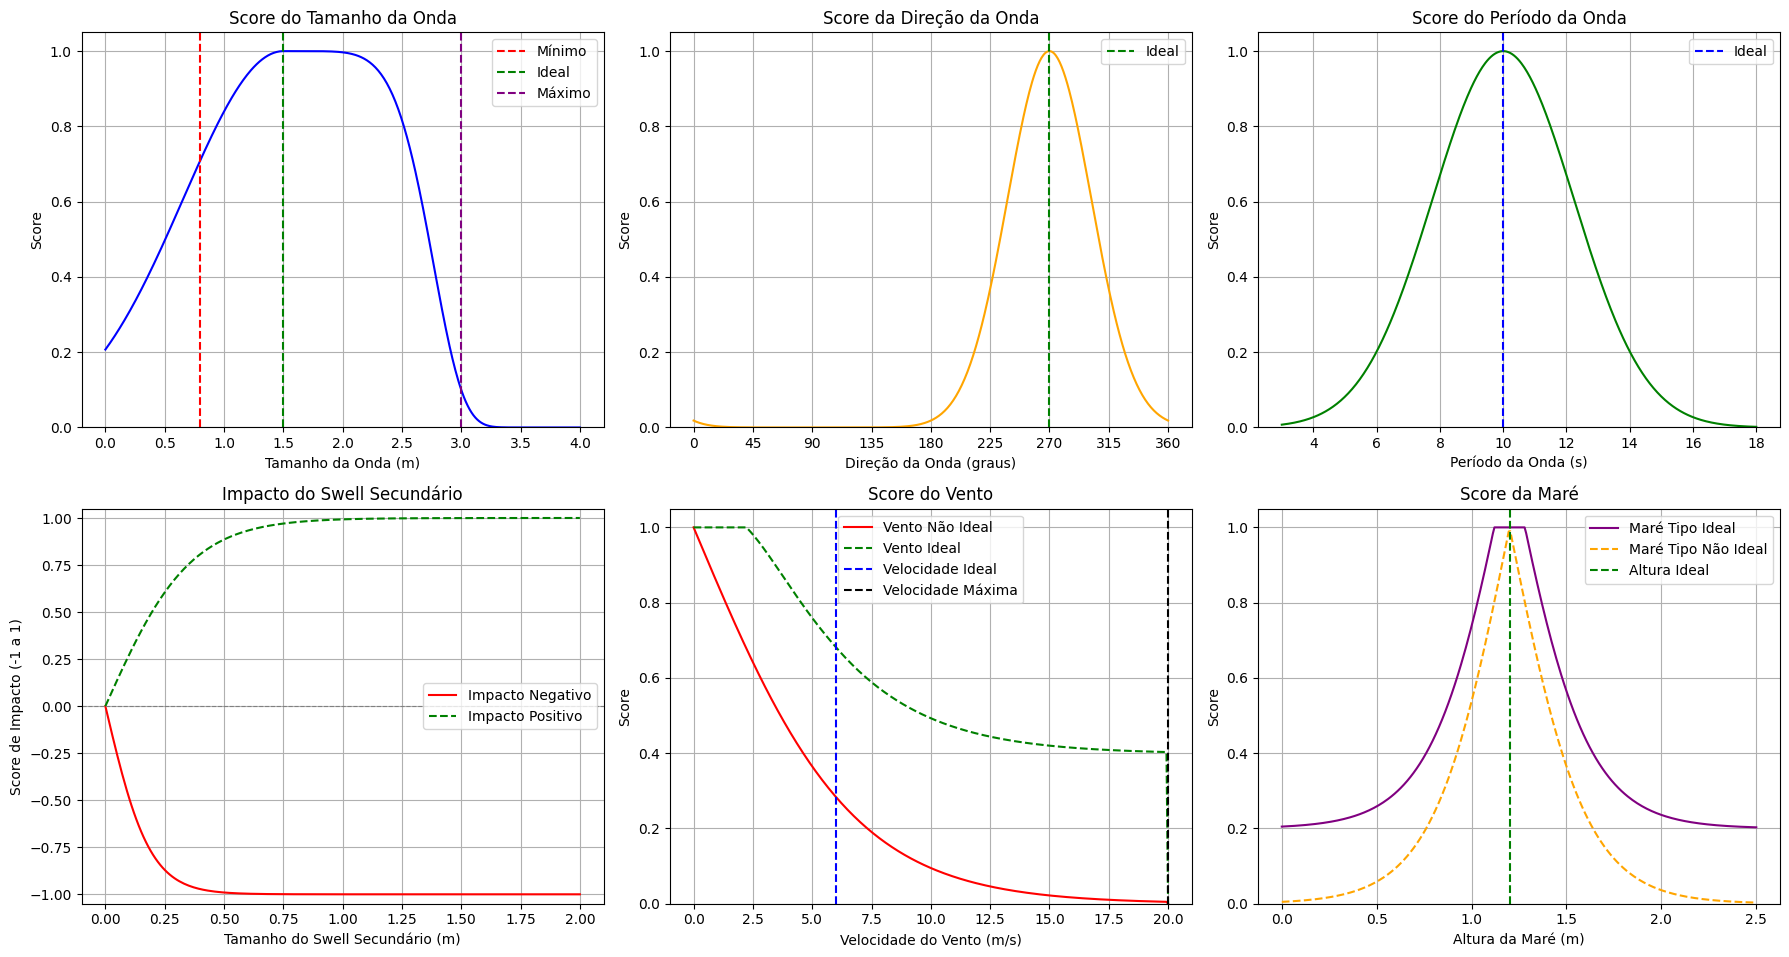

Geração de gráficos concluída.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wave_score import (
    calcular_score_tamanho_onda,
    calcular_score_direcao_onda,
    calcular_score_periodo_onda,
    calcular_impacto_swell_secundario
)
from wind_score import calcular_score_vento
from tide_score import calcular_score_mare

# --- Previsões ---
previsao_onda_principal = {
    'tamanho': 1.8,
    'periodo': 9.0,
    'direcao': 270.0
}

previsao_swell_secundario = {
    'tamanho': 0.7,
    'periodo': 5.0,
    'direcao': 90.0
}

parametros_score = {
    'tamanho': {'minimo': 0.8, 'ideal': 1.5, 'maximo': 3.0},
    'direcao': {'ideal': 270.0},
    'periodo': {'ideal': 10.0}
}

parametros_vento = {
    'ideal_direcao': 90.0,
    'ideal_velocidade': 6.0,
    'max_velocidade': 20.0
}

parametros_mare = {
    'mare_ideal': 1.2,
    'mare_tipo_ideal': 'alta',
}

print("Gerando gráficos com a previsão definida...")

# --- Dados Ondas ---
tamanhos_plot = np.linspace(0, 4.0, 500)
scores_tamanho = calcular_score_tamanho_onda(
    tamanhos_plot,
    parametros_score['tamanho']['minimo'],
    parametros_score['tamanho']['ideal'],
    parametros_score['tamanho']['maximo']
)

direcoes_plot = np.linspace(0, 360, 500)
scores_direcao = calcular_score_direcao_onda(
    direcoes_plot,
    parametros_score['direcao']['ideal']
)

periodos_plot = np.linspace(3.0, 18.0, 500)
scores_periodo = calcular_score_periodo_onda(
    periodos_plot,
    parametros_score['periodo']['ideal']
)

# --- Dados Swell Secundário ---
tamanhos_swell_sec_impacto_plot = np.linspace(0, 2.0, 200)

impactos_swell_secundario = calcular_impacto_swell_secundario(
    tamanhos_swell_sec_impacto_plot,
    previsao_swell_secundario['periodo'],
    previsao_swell_secundario['direcao'],
    previsao_onda_principal['tamanho'],
    previsao_onda_principal['periodo'],
    previsao_onda_principal['direcao']
)

# Impacto positivo (parâmetros que maximizam impacto positivo)
impactos_swell_secundario_positivo = calcular_impacto_swell_secundario(
    tamanhos_swell_sec_impacto_plot,
    12.0,   # período maior que o principal (bônus suave)
    270.0,  # direção alinhada (impacto positivo)
    previsao_onda_principal['tamanho'],
    previsao_onda_principal['periodo'],
    previsao_onda_principal['direcao']
)

# --- Dados Vento ---
velocidades_plot = np.linspace(0, parametros_vento['max_velocidade'], 300)

scores_vento_nao_ideal = calcular_score_vento(
    velocidades_plot,
    np.full_like(velocidades_plot, parametros_vento['ideal_direcao'] + 90),  # direção desfavorável
    parametros_vento['ideal_direcao'],
    ideal_wind=parametros_vento['ideal_velocidade'],
    max_wind=parametros_vento['max_velocidade']
)

scores_vento_ideal = calcular_score_vento(
    velocidades_plot,
    np.full_like(velocidades_plot, parametros_vento['ideal_direcao']),
    parametros_vento['ideal_direcao'],
    ideal_wind=parametros_vento['ideal_velocidade'],
    max_wind=parametros_vento['max_velocidade']
)

# --- Dados Maré ---
alturas_mare = np.linspace(0, 2.5, 300)

tipos_mare_previsao_ideal = np.full_like(alturas_mare, parametros_mare['mare_tipo_ideal'], dtype='<U10')
# Para não ideal, tipo oposto simples
tipo_oposto = 'baixa' if parametros_mare['mare_tipo_ideal'] == 'alta' else 'alta'
tipos_mare_previsao_nao_ideal = np.full_like(alturas_mare, tipo_oposto, dtype='<U10')

scores_mare_ideal = calcular_score_mare(
    alturas_mare,
    parametros_mare['mare_ideal'],
    tipos_mare_previsao_ideal,
    parametros_mare['mare_tipo_ideal']
)

scores_mare_nao_ideal = calcular_score_mare(
    alturas_mare,
    parametros_mare['mare_ideal'],
    tipos_mare_previsao_nao_ideal,
    parametros_mare['mare_tipo_ideal']
)
# --- Plotagem ---

plt.figure(figsize=(18, 14))

# Ondas: Tamanho
plt.subplot(3, 3, 1)
plt.plot(tamanhos_plot, scores_tamanho, color='blue')
plt.axvline(parametros_score['tamanho']['minimo'], color='red', linestyle='--', label='Mínimo')
plt.axvline(parametros_score['tamanho']['ideal'], color='green', linestyle='--', label='Ideal')
plt.axvline(parametros_score['tamanho']['maximo'], color='purple', linestyle='--', label='Máximo')
plt.title('Score do Tamanho da Onda')
plt.xlabel('Tamanho da Onda (m)')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)

# Ondas: Direção
plt.subplot(3, 3, 2)
plt.plot(direcoes_plot, scores_direcao, color='orange')
plt.axvline(parametros_score['direcao']['ideal'], color='green', linestyle='--', label='Ideal')
plt.title('Score da Direção da Onda')
plt.xlabel('Direção da Onda (graus)')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)
plt.xticks(np.arange(0, 361, 45))

# Ondas: Período
plt.subplot(3, 3, 3)
plt.plot(periodos_plot, scores_periodo, color='green')
plt.axvline(parametros_score['periodo']['ideal'], color='blue', linestyle='--', label='Ideal')
plt.title('Score do Período da Onda')
plt.xlabel('Período da Onda (s)')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)

# Swell Secundário (Impactos Negativo e Positivo)
plt.subplot(3, 3, 4)
plt.plot(tamanhos_swell_sec_impacto_plot, impactos_swell_secundario, color='red', label='Impacto Negativo')
plt.plot(tamanhos_swell_sec_impacto_plot, impactos_swell_secundario_positivo, color='green', linestyle='--', label='Impacto Positivo')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Impacto do Swell Secundário')
plt.xlabel('Tamanho do Swell Secundário (m)')
plt.ylabel('Score de Impacto (-1 a 1)')
plt.grid(True)
plt.legend()
plt.ylim(-1.05, 1.05)

# Vento: Ideal e Não Ideal juntos
plt.subplot(3, 3, 5)
plt.plot(velocidades_plot, scores_vento_nao_ideal, color='red', label='Vento Não Ideal')
plt.plot(velocidades_plot, scores_vento_ideal, color='green', linestyle='--', label='Vento Ideal')
plt.axvline(parametros_vento['ideal_velocidade'], color='blue', linestyle='--', label='Velocidade Ideal')
plt.axvline(parametros_vento['max_velocidade'], color='black', linestyle='--', label='Velocidade Máxima')
plt.title('Score do Vento')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)

# Maré: Ideal e Não Ideal juntos
plt.subplot(3, 3, 6)
plt.plot(alturas_mare, scores_mare_ideal, color='purple', label='Maré Tipo Ideal')
plt.plot(alturas_mare, scores_mare_nao_ideal, color='orange', linestyle='--', label='Maré Tipo Não Ideal')
plt.axvline(parametros_mare['mare_ideal'], color='green', linestyle='--', label='Altura Ideal')
plt.title('Score da Maré')
plt.xlabel('Altura da Maré (m)')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)

plt.tight_layout()
plt.show()

print("Geração de gráficos concluída.")
